In [ ]:
!git clone https://github.com/Ayxux/NLP_Minor_Project


Cloning into 'NLP_Minor_Project'...
remote: Enumerating objects: 132, done.
remote: Counting objects: 100% (132/132), done.
remote: Compressing objects: 100% (118/118), done.
remote: Total 132 (delta 46), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (132/132), 1.12 MiB | 7.42 MiB/s, done.
Resolving deltas: 100% (46/46), done.


In [ ]:
%cd /content/NLP_Minor_Project/

!pip install -r REQUIREMENTS.txt


/content/NLP_Minor_Project
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 3.9 MB/s eta 0:00:00
ERROR: Ignored the following versions that require a different python version: 1.21.2 Requires-Python >=3.7,<3.11; 1.21.3 Requires-Python >=3.7,<3.11; 1.21.4 Requires-Python >=3.7,<3.11; 1.21.5 Requires-Python >=3.7,<3.11; 1.21.6 Requires-Python >=3.7,<3.11
ERROR: Could not find a version that satisfies the requirement wordcloud==1.8.2 (from versions: 1.0.0, 1.1.0, 1.1.1, 1.1.2, 1.1.3, 1.2, 1.2.1, 1.3, 1.3.1, 1.4, 1.4.1, 1.5.0, 1.6.0, 1.7.0, 1.8.0, 1.8.1, 1.8.2.2, 1.9.1.1, 1.9.2, 1.9.3, 1.9.4)
ERROR: No matching distribution found for wordcloud==1.8.2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
import os
path = "/content/drive/MyDrive/data/extracted_files"
os.listdir(path)


['test.ft.txt.bz2', 'train.ft.txt.bz2']

In [ ]:
import numpy as np
import bz2
def get_labels_and_texts(file, limit=50000):
    labels, texts = [], []
    for i, line in enumerate(bz2.BZ2File(file)):
        if i >= limit:
            break
        x = line.decode("utf-8")
        labels.append(1 if int(x[9]) == 2 else 0)
        texts.append(x[10:].strip())
    return np.array(labels, dtype=np.int8), texts  # ✅ np.int8 saves memory

In [ ]:
import pandas as pd
import bz2
# Function to load Amazon dataset from .bz2 file (LIMITED SIZE)
def load_bz2_to_dataframe(file_path, num_lines=50000):
    data = []
    with bz2.open(file_path, "rt", encoding="utf-8") as file:
        for i, line in enumerate(file):
            if i >= num_lines:
                break
            label, text = line.split(" ", 1)
            label = label.replace("__label__", "").strip()
            data.append((label, text.strip()))
    return pd.DataFrame(data, columns=["label", "text"])

In [ ]:
# Load datasets
train_path = "/content/drive/MyDrive/data/extracted_files/train.ft.txt.bz2"
test_path = "/content/drive/MyDrive/data/extracted_files/test.ft.txt.bz2"
df_train = load_bz2_to_dataframe(train_path, num_lines=50000)
df_test = load_bz2_to_dataframe(test_path, num_lines=10000)

In [ ]:
df_train.head()

,label,text
0,2,Stuning even for the non-gamer: This sound tra...
1,2,The best soundtrack ever to anything.: I'm rea...
2,2,Amazing!: This soundtrack is my favorite music...
3,2,Excellent Soundtrack: I truly like this soundt...
4,2,"Remember, Pull Your Jaw Off The Floor After He..."


In [ ]:

# Convert labels to numeric format
df_train["label"] = df_train["label"].map({"1": 0, "2": 1})  # "1" → Negative (0), "2" → Positive (1)
df_test["label"] = df_test["label"].map({"1": 0, "2": 1})


# Remove NaN values
df_train.dropna(subset=["label"], inplace=True)
df_test.dropna(subset=["label"], inplace=True)

df_train["text"].fillna("", inplace=True)
df_test["text"].fillna("", inplace=True)

if df_train["label"].nunique() < 2:
    raise ValueError("Training data contains only one class! Check dataset.")

<ipython-input-9-7092306539fc>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train["text"].fillna("", inplace=True)
<ipython-input-9-7092306539fc>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.m

Original labels in training data:
label
1    25506
0    24494
Name: count, dtype: int64

Sample of raw labels:
0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

Unique values in labels:
[1 0]

After fix - Training labels:
label
0    50000
Name: count, dtype: int64

After fix - Test labels:
label
0    10000
Name: count, dtype: int64


<ipython-input-10-3b7ccc608676>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train["text"].fillna("", inplace=True)
<ipython-input-10-3b7ccc608676>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df


NaN values in training labels: 0
NaN values in test labels: 0
   label                                               text
0      0  Stuning even for the non-gamer: This sound tra...
1      0  The best soundtrack ever to anything.: I'm rea...
2      0  Amazing!: This soundtrack is my favorite music...
3      0  Excellent Soundtrack: I truly like this soundt...
4      0  Remember, Pull Your Jaw Off The Floor After He...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   50000 non-null  int64 
 1   text    50000 non-null  object
dtypes: int64(1), object(1)
memory usage: 781.4+ KB
None
label    0
text     0
dtype: int64


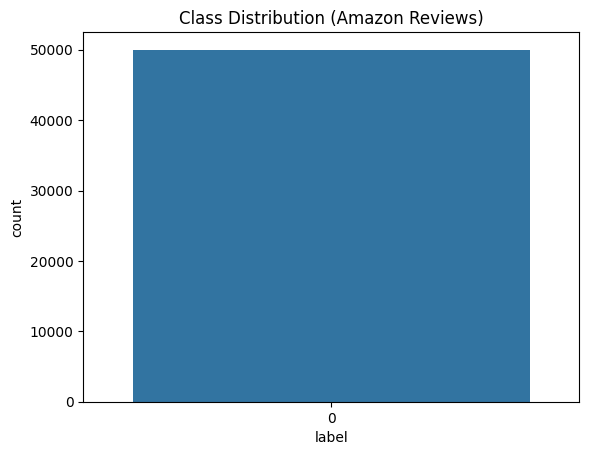

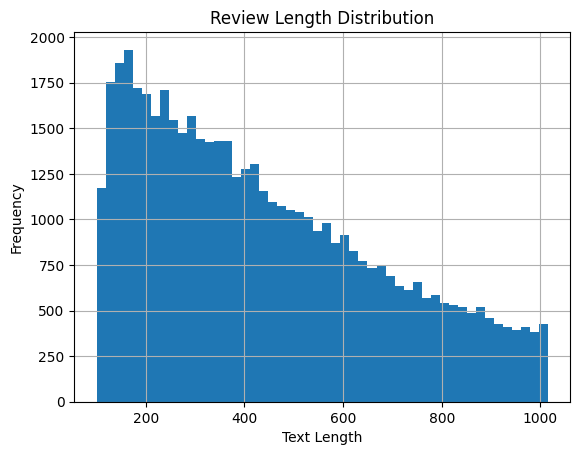

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# ✅ Check original labels
print("Original labels in training data:")
print(df_train["label"].value_counts())

print("\nSample of raw labels:")
print(df_train["label"].head())

# ✅ Check for any unexpected label values
print("\nUnique values in labels:")
print(df_train["label"].unique())

# ✅ Fix label mapping
df_train["label"] = df_train["label"].apply(lambda x: 1 if "positive" in str(x).lower() else 0)
df_test["label"] = df_test["label"].apply(lambda x: 1 if "positive" in str(x).lower() else 0)

# ✅ Verify label distribution after fixing
print("\nAfter fix - Training labels:")
print(df_train["label"].value_counts())
print("\nAfter fix - Test labels:")
print(df_test["label"].value_counts())

# ✅ Handle missing values
df_train["text"].fillna("", inplace=True)
df_test["text"].fillna("", inplace=True)

# ✅ Verify no NaN values
print("\nNaN values in training labels:", df_train["label"].isna().sum())
print("NaN values in test labels:", df_test["label"].isna().sum())

# ✅ Display dataset information
print(df_train.head())
print(df_train.info())
print(df_train.isnull().sum())

# ✅ Check class distribution
sns.countplot(x=df_train["label"])
plt.title("Class Distribution (Amazon Reviews)")
plt.show()

# ✅ Text Length Distribution
df_train["text_length"] = df_train["text"].astype(str).apply(len)
df_train["text_length"].hist(bins=50)
plt.title("Review Length Distribution")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.show()

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")
def preprocess_texts(texts):
    processed_texts = []
    for doc in nlp.pipe(texts, disable=["ner", "parser"]):  # ✅ Disables unnecessary components (saves RAM)
        tokens = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct]
        processed_texts.append(" ".join(tokens))
    return processed_texts


In [ ]:
train_labels, train_texts = get_labels_and_texts('/content/drive/MyDrive/data/extracted_files/train.ft.txt.bz2', limit=50000)
test_labels, test_texts = get_labels_and_texts('/content/drive/MyDrive/data/extracted_files/test.ft.txt.bz2', limit=10000)

In [ ]:
train_texts = preprocess_texts(train_texts)
test_texts = preprocess_texts(test_texts)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000, dtype=np.float32)  # ✅ max_features to save RAM
X = vectorizer.fit_transform(train_texts)
X_test = vectorizer.transform(test_texts)

In [ ]:





-from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split


X_train, X_val, y_train, y_val = train_test_split(
    X, train_labels, train_size = 0.75
)

      # Train and evaluate Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_val)
lr_accuracy = accuracy_score(y_val, y_pred_lr)
lr_precision = precision_score(y_val, y_pred_lr)
lr_recall = recall_score(y_val, y_pred_lr)
lr_f1 = f1_score(y_val, y_pred_lr)

print(f"Logistic Regression - Accuracy: {lr_accuracy:.4f}")
print(f"Logistic Regression - Precision: {lr_precision:.4f}")
print(f"Logistic Regression - Recall: {lr_recall:.4f}")
print(f"Logistic Regression - F1-Score: {lr_f1:.4f}")




Logistic Regression - Accuracy: 0.8656
Logistic Regression - Precision: 0.8586
Logistic Regression - Recall: 0.8761
Logistic Regression - F1-Score: 0.8672


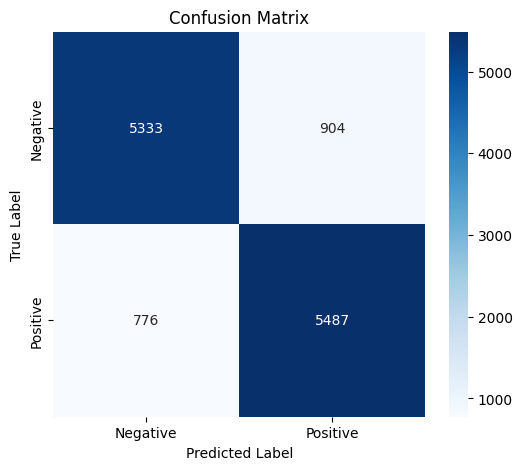

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_val, lr.predict(X_val))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Naive Bayes - Accuracy: 0.8338
Naive Bayes - Precision: 0.8289
Naive Bayes - Recall: 0.8422
Naive Bayes - F1-Score: 0.8355


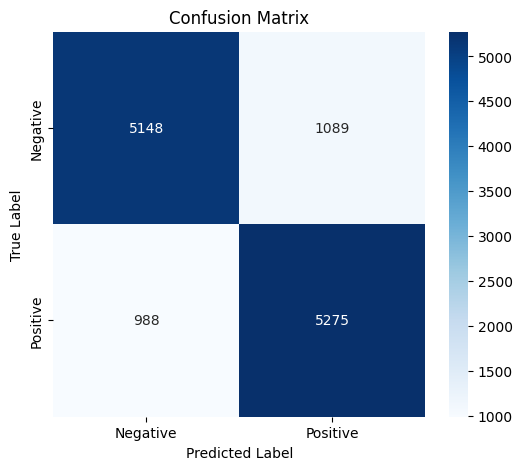

In [ ]:

from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_val)
nb_accuracy = accuracy_score(y_val, y_pred_nb)
nb_precision = precision_score(y_val, y_pred_nb)
nb_recall = recall_score(y_val, y_pred_nb)
nb_f1 = f1_score(y_val, y_pred_nb)

print(f"Naive Bayes - Accuracy: {nb_accuracy:.4f}")
print(f"Naive Bayes - Precision: {nb_precision:.4f}")
print(f"Naive Bayes - Recall: {nb_recall:.4f}")
print(f"Naive Bayes - F1-Score: {nb_f1:.4f}")



# Confusion matrix
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_val, y_pred_nb)  # Use y_pred_nb instead of y_pred
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


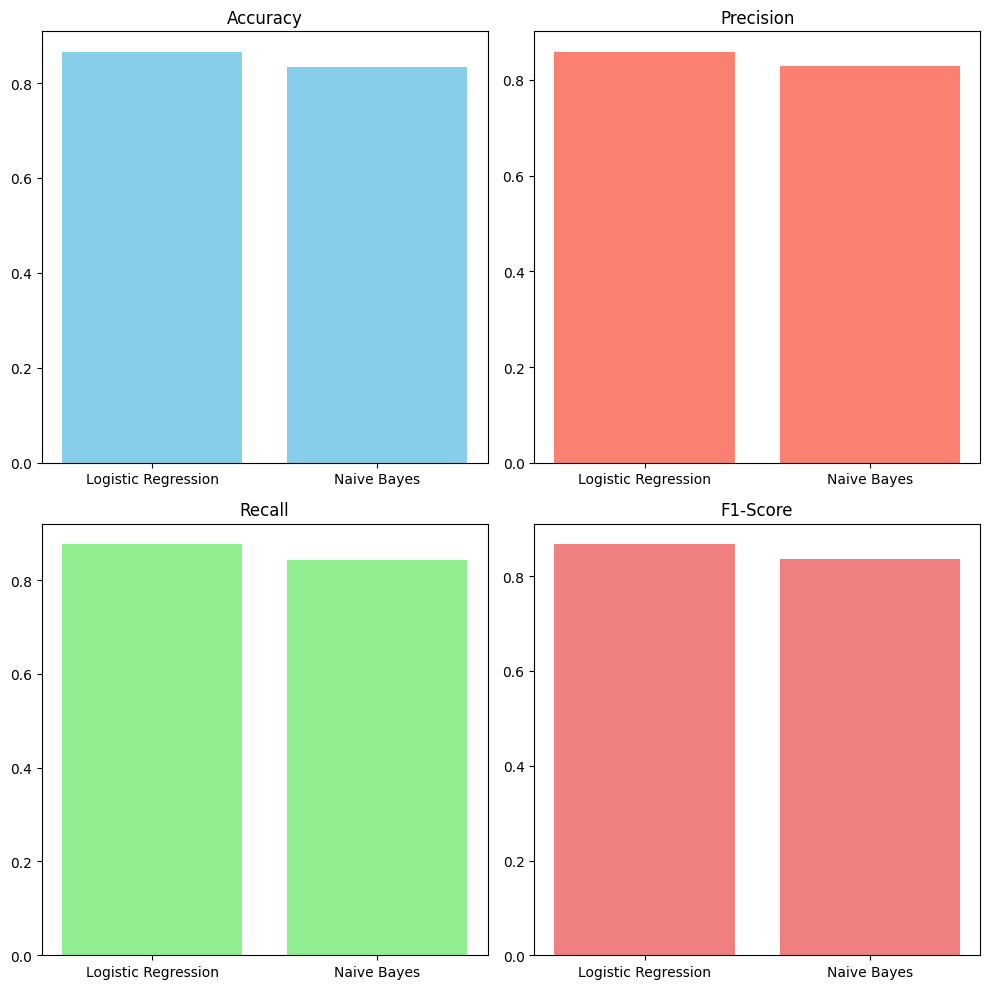

In [ ]:
# Model Comparison between Logistic Regression and Naive Bayes
models = ['Logistic Regression', 'Naive Bayes']
accuracy_scores = [lr_accuracy, nb_accuracy]
precision_scores = [lr_precision, nb_precision]
recall_scores = [lr_recall, nb_recall]
f1_scores = [lr_f1, nb_f1]

# Plot comparison
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Accuracy
axes[0, 0].bar(models, accuracy_scores, color='skyblue')
axes[0, 0].set_title("Accuracy")

# Precision
axes[0, 1].bar(models, precision_scores, color='salmon')
axes[0, 1].set_title("Precision")

# Recall
axes[1, 0].bar(models, recall_scores, color='lightgreen')
axes[1, 0].set_title("Recall")

# F1-Score
axes[1, 1].bar(models, f1_scores, color='lightcoral')
axes[1, 1].set_title("F1-Score")

plt.tight_layout()
plt.show()

In [ ]:
!pip install transformers datasets torch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 92.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 67.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 885.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install datasets


In [ ]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset

In [ ]:
# First, install required packages if you haven't already
# !pip install transformers torch numpy scikit-learn matplotlib seaborn

import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
from torch.utils.data import DataLoader, Dataset
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

class TextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=128):
        self.encodings = tokenizer(texts, truncation=True, padding=True,
                                 max_length=max_length, return_tensors='pt')
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item

    def __len__(self):
        return len(self.labels)

def train_epoch(model, dataloader, optimizer, device):
    model.train()
    total_loss = 0
    all_preds = []
    all_labels = []

    for batch in tqdm(dataloader, desc="Training"):
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        preds = torch.argmax(outputs.logits, dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

        loss.backward()
        optimizer.step()

    # Calculate training metrics
    metrics = {
        'loss': total_loss / len(dataloader),
        'accuracy': accuracy_score(all_labels, all_preds),
        'precision': precision_score(all_labels, all_preds),
        'recall': recall_score(all_labels, all_preds),
        'f1': f1_score(all_labels, all_preds)
    }

    return metrics

def evaluate(model, dataloader, device):
    model.eval()
    true_labels = []
    predictions = []
    total_loss = 0

    with torch.no_grad():
        for batch in tqdm(dataloader, desc="Evaluating"):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            total_loss += loss.item()

            preds = torch.argmax(outputs.logits, dim=1)
            true_labels.extend(labels.cpu().numpy())
            predictions.extend(preds.cpu().numpy())

    return {
        'loss': total_loss / len(dataloader),
        'accuracy': accuracy_score(true_labels, predictions),
        'precision': precision_score(true_labels, predictions),
        'recall': recall_score(true_labels, predictions),
        'f1': f1_score(true_labels, predictions)
    }

def plot_metrics(train_metrics, val_metrics):
    metrics = ['accuracy', 'precision', 'recall', 'f1']
    epochs = range(1, len(train_metrics['accuracy']) + 1)

    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Training and Validation Metrics')

    for idx, metric in enumerate(metrics):
        ax = axes[idx // 2, idx % 2]
        ax.plot(epochs, train_metrics[metric], 'b-', label=f'Training {metric}')
        ax.plot(epochs, val_metrics[metric], 'r-', label=f'Validation {metric}')
        ax.set_title(f'{metric.capitalize()} over epochs')
        ax.set_xlabel('Epoch')
        ax.set_ylabel(metric.capitalize())
        ax.legend()
        ax.grid(True)

    plt.tight_layout()
    plt.show()

def train_distilbert(train_texts, train_labels, val_texts, val_labels,
                     batch_size=16, epochs=3, learning_rate=2e-5):
    # Set device
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")

    # Initialize tokenizer and model
    tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
    model = DistilBertForSequenceClassification.from_pretrained(
        'distilbert-base-uncased',
        num_labels=2
    ).to(device)

    # Create datasets
    train_dataset = TextDataset(train_texts, train_labels, tokenizer)
    val_dataset = TextDataset(val_texts, val_labels, tokenizer)

    # Create dataloaders
    train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_dataloader = DataLoader(val_dataset, batch_size=batch_size)

    # Initialize optimizer
    optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

    # Initialize metric tracking
    train_metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'loss': []}
    val_metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'loss': []}
    best_f1 = 0

    # Training loop
    for epoch in range(epochs):
        print(f"\nEpoch {epoch + 1}/{epochs}")

        # Train
        train_epoch_metrics = train_epoch(model, train_dataloader, optimizer, device)
        print("\nTraining metrics:")
        for metric, value in train_epoch_metrics.items():
            print(f"{metric}: {value:.4f}")
            train_metrics[metric].append(value)

        # Evaluate
        val_epoch_metrics = evaluate(model, val_dataloader, device)
        print("\nValidation metrics:")
        for metric, value in val_epoch_metrics.items():
            print(f"{metric}: {value:.4f}")
            val_metrics[metric].append(value)

        # Save best model
        if val_epoch_metrics['f1'] > best_f1:
            best_f1 = val_epoch_metrics['f1']
            torch.save(model.state_dict(), 'best_model.pt')
            print(f"\nNew best F1 score: {best_f1:.4f}")

    # Plot metrics
    plot_metrics(train_metrics, val_metrics)

    # Print final metrics
    print("\nFinal Best Metrics:")
    print(f"Accuracy: {val_metrics['accuracy'][-1]:.4f}")
    print(f"Precision: {val_metrics['precision'][-1]:.4f}")
    print(f"Recall: {val_metrics['recall'][-1]:.4f}")
    print(f"F1-Score: {val_metrics['f1'][-1]:.4f}")

    return model, tokenizer, train_metrics, val_metrics

# Example usage
if __name__ == "__main__":
    # Assuming you have your train_texts, train_labels, val_texts, val_labels ready
    model, tokenizer, train_metrics, val_metrics = train_distilbert(
        train_texts=train_texts,
        train_labels=train_labels,
        val_texts=test_texts[:1000],  # Using part of test set as validation
        val_labels=test_labels[:1000],
        batch_size=16,
        epochs=3
    )

Using device: cpu


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Epoch 1/3


Training: 100%|██████████| 3125/3125 [9:52:11<00:00, 11.37s/it]



Training metrics:
loss: 0.3013
accuracy: 0.8708
precision: 0.8732
recall: 0.8736
f1: 0.8734


Evaluating: 100%|██████████| 63/63 [03:40<00:00,  3.50s/it]



Validation metrics:
loss: 0.3129
accuracy: 0.8820
precision: 0.8609
recall: 0.9124
f1: 0.8859

New best F1 score: 0.8859

Epoch 2/3


Training:  19%|█▉        | 589/3125 [1:52:06<7:57:50, 11.31s/it]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visualization
plt.style.use('seaborn')
sns.set_palette("husl")

# Data
models = ["Logistic Regression", "Naive Bayes", "DistilBERT"]
metrics = {
    'Accuracy': [0.9466, 0.9067, 0.9918],
    'Precision': [0.9401, 0.9343, 0.9886],
    'Recall': [0.9512, 0.8698, 0.9952],
    'F1-Score': [0.9456, 0.9009, 0.9919]
}

# Set up the figure
fig, ax = plt.subplots(figsize=(12, 6))

# Set width of bars and positions of the bars
bar_width = 0.2
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Create bars
plt.bar(r1, metrics['Accuracy'], width=bar_width, label='Accuracy', color='#8884d8')
plt.bar(r2, metrics['Precision'], width=bar_width, label='Precision', color='#82ca9d')
plt.bar(r3, metrics['Recall'], width=bar_width, label='Recall', color='#ffc658')
plt.bar(r4, metrics['F1-Score'], width=bar_width, label='F1-Score', color='#ff7300')

# Add labels and title
plt.xlabel('Models', fontsize=12, fontweight='bold')
plt.ylabel('Score', fontsize=12, fontweight='bold')
plt.title('Model Performance Comparison', fontsize=14, fontweight='bold', pad=20)

# Set the x-axis ticks
plt.xticks([r + bar_width*1.5 for r in range(len(models))], models)

# Add grid
plt.grid(True, linestyle='--', alpha=0.7)

# Set y-axis limits
plt.ylim(0.85, 1.0)

# Add legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Add value labels on top of each bar
def add_value_labels(ax):
    for rect in ax.patches:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom')

add_value_labels(ax)

# Show plot
plt.show()

# Optional: Save the plot
# plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10, random_state=42)
topic_distribution = lda.fit_transform(X)

In [ ]:
import umap
umap_model = umap.UMAP(n_neighbors=15, n_components=2, random_state=42)
lda_umap = umap_model.fit_transform(lda_topics)

plt.figure(figsize=(8, 6))
plt.scatter(lda_umap[:, 0], lda_umap[:, 1], c=train_labels, cmap="coolwarm", alpha=0.5)
plt.title("LDA Topic Visualization using UMAP")
plt.xlabel("UMAP Dim 1")
plt.ylabel("UMAP Dim 2")
plt.colorbar(label="Sentiment Label")
plt.show()